# wedge 積の高速化 (縮約密度行列の計算まで)


## Visualizer

偶数次元の tensor を可視化するためのコードを作成した。 主に`pl.imshow`を利用している。

2 つの表示方法を用意した。(今回の場合、その違いがあるのは 4 次元の時のみ)

- **Karnaugh**

  カルノー図のように多次元配列を表現する。<br>
  (尤も、ハミング距離が 1 などという訳ではない。)<br>
  これは全ての偶数次元のテンソルで表示可能。

- **Nest**

  二次元配列を入れ子のようにして表示させる。<br>
  これは 2 の累乗次元のテンソルだけが表示可能。

二つの表示方法で、添え字同士が一致する部分の形が変わるので、より効率的に 0 要素を目視で確認することが出来る。


### コード


In [1]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
from typing import List


In [2]:
def vis_subroutine(N: int, twoD: List[List[complex]], size: int, title: str = None):
    fig = plt.figure(figsize=(size, size))
    ax = fig.add_subplot(1, 1, 1)
    plt.xticks([], [])
    plt.yticks([], [])
    plt.imshow(twoD, origin="upper")
    plt.colorbar()
    plt.title(title if title is not None else f"N:{N}", y=1.2, fontsize=15)
    params = {"va": "center", "ha": "center",
              "fontsize": 12, "transform": ax.transAxes}
    return fig, ax, params


In [3]:
def vis2dTensorKarnaugh(tensor: np.array, size: int = 8, title=None):
    N = tensor.shape[0]

    assert len(tensor.shape) == 2, tensor.shape
    assert len(set(tensor.shape)) == 1, tensor.shape
    assert N**2 <= 1000000, f"N^2={N**2}, which is too big to vis."

    listTensor = tensor.tolist()
    twoD = [
        [abs(listTensor[i][j])
         for i in range(N)]
        for j in range(N)
    ]

    fig, ax, params = vis_subroutine(N, twoD, size, title)

    x = 0
    for i in range(N):
        plt.text((x+1/2)/(N), 1.05, str(i), **params)
        x += 1
    plt.text(-0.02, 1.05, "i", color="blue", **params)

    y = 0
    for j in range(N):
        plt.text(-0.05, 1-(y+1/2)/(N), str(j),  **params)
        y += 1
    plt.text(-0.05, 1.02, "j",  color="blue", **params)

    plt.show()


In [4]:
def vis4dTensorKarnaugh(tensor: np.array, size: int = 8, title=None):
    N = tensor.shape[0]

    assert len(tensor.shape) == 4, tensor.shape
    assert len(set(tensor.shape)) == 1, tensor.shape
    assert N**4 <= 1000000, f"N^4={N**4}, which is too big to vis."

    listTensor = tensor.tolist()
    twoD = [
        [abs(listTensor[i][j][k][l])
         for i, j in itertools.product(range(N), range(N))]
        for k, l in itertools.product(range(N), range(N))
    ]

    fig, ax, params = vis_subroutine(N, twoD, size, title)

    x = 0
    for i in range(N):
        plt.text((x+N/2)/(N*N), 1.1, str(i), **params)
        for j in range(N):
            plt.text((x+1/2)/(N*N), 1.05, str(j),  **params)
            x += 1
    plt.text(-0.02, 1.1, "i", color="blue", **params)
    plt.text(-0.02, 1.05, "j", color="blue", **params)

    y = 0
    for k in range(N):
        plt.text(-0.1, 1-(y+N/2)/(N*N), str(k),  **params)
        for l in range(N):
            plt.text(-0.05, 1-(y+1/2)/(N*N), str(l), **params)
            y += 1
    plt.text(-0.1, 1.02, "k",  color="blue", **params)
    plt.text(-0.05, 1.02, "l",  color="blue", **params)

    plt.show()


In [5]:
def vis4dTensorNest(tensor: np.array, size: int = 8, title=None):
    N = tensor.shape[0]

    assert len(tensor.shape) == 4, tensor.shape
    assert len(set(tensor.shape)) == 1, tensor.shape
    assert N**4 <= 1000000, f"N^4={N**4}, which is too big to vis."

    listTensor = tensor.tolist()
    twoD = [
        [abs(listTensor[i][j][k][l])
         for i, k in itertools.product(range(N), range(N))]
        for j, l in itertools.product(range(N), range(N))
    ]

    fig, ax, params = vis_subroutine(N, twoD, size, title)

    x = 0
    for i in range(N):
        plt.text((x+N/2)/(N*N), 1.1, str(i), **params)
        for k in range(N):
            plt.text((x+1/2)/(N*N), 1.05, str(k),  **params)
            x += 1
    plt.text(-0.02, 1.1, "i", color="blue", **params)
    plt.text(-0.02, 1.05, "k", color="blue", **params)

    y = 0
    for j in range(N):
        plt.text(-0.1, 1-(y+N/2)/(N*N), str(j),  **params)
        for l in range(N):
            plt.text(-0.05, 1-(y+1/2)/(N*N), str(l), **params)
            y += 1
    plt.text(-0.1, 1.02, "j",  color="blue", **params)
    plt.text(-0.05, 1.02, "l",  color="blue", **params)

    plt.show()


In [6]:
def vis6dTensorKarnaugh(tensor: np.array, size: int = 8, title=None):
    N = tensor.shape[0]

    assert len(tensor.shape) == 6, tensor.shape
    assert len(set(tensor.shape)) == 1, tensor.shape
    assert N**6 <= 1000000, f"N^6={N**6}, which is too big to vis."

    listTensor = tensor.tolist()
    twoD = [
        [abs(listTensor[i][j][k][l][m][n])
         for i, j, k in itertools.product(range(N), range(N), range(N))]
        for l, m, n in itertools.product(range(N), range(N), range(N))
    ]

    fig, ax, params = vis_subroutine(N, twoD, size, title)

    x = 0
    for i in range(N):
        plt.text((x+N*N/2)/(N*N*N), 1.15, str(i), **params)
        for j in range(N):
            plt.text((x+N/2)/(N*N*N), 1.10, str(j),  **params)
            for k in range(N):
                plt.text((x+1/2)/(N*N*N), 1.05, str(k),  **params)
                x += 1
    plt.text(-0.02, 1.15, "i", color="blue", **params)
    plt.text(-0.02, 1.10, "j", color="blue", **params)
    plt.text(-0.02, 1.05, "k", color="blue", **params)

    y = 0
    for l in range(N):
        plt.text(-0.15, 1-(y+N*N/2)/(N*N*N), str(l),  **params)
        for m in range(N):
            plt.text(-0.10, 1-(y+N/2)/(N*N*N), str(m), **params)
            for n in range(N):
                plt.text(-0.05, 1-(y+1/2)/(N*N*N), str(n), **params)
                y += 1
    plt.text(-0.15, 1.02, "l",  color="blue", **params)
    plt.text(-0.10, 1.02, "m",  color="blue", **params)
    plt.text(-0.05, 1.02, "n",  color="blue", **params)

    plt.show()


### 検証


In [7]:
a = np.resize(np.arange(3**2), (3, 3))
b = np.resize(np.arange(3**4), (3, 3, 3, 3))
c = np.resize(np.arange(3**6), (3, 3, 3, 3, 3, 3))


vis2dTensor(a)


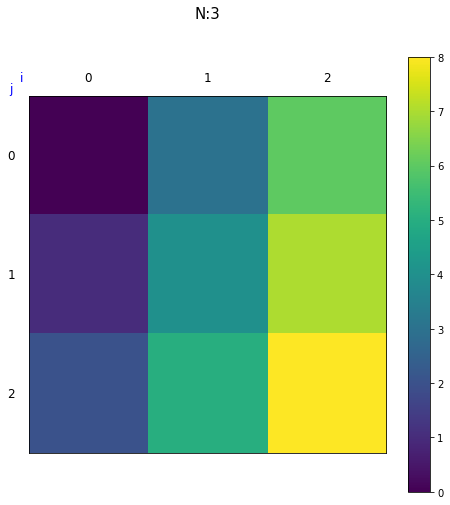

vis4dTensorKarnaugh(b)


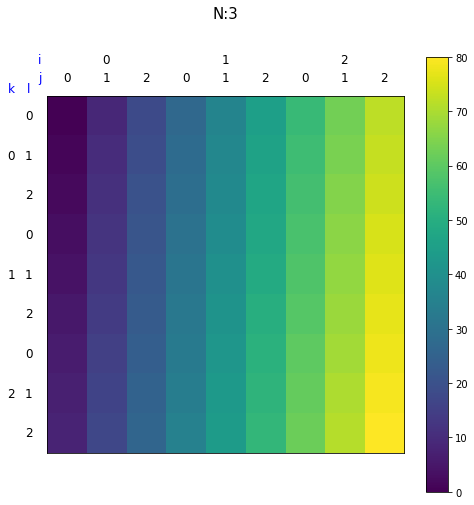

vis6dTensorKarnaugh(c)


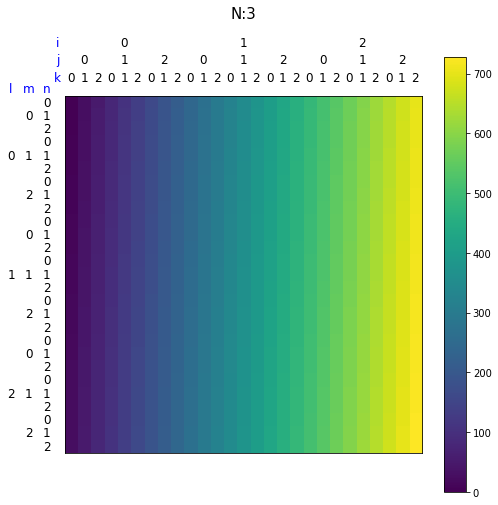

vis4dTensorNest(b)


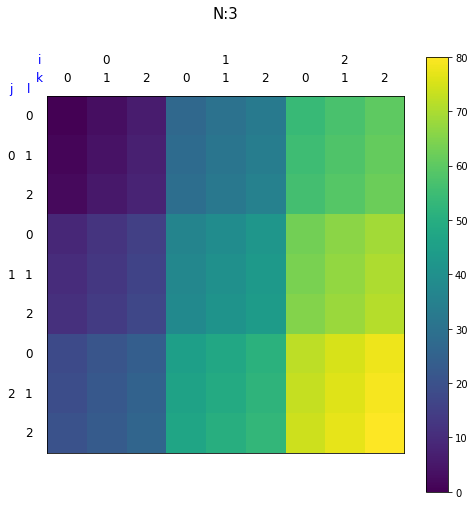

In [8]:
print("vis2dTensor(a)")
vis2dTensorKarnaugh(a)
print("vis4dTensorKarnaugh(b)")
vis4dTensorKarnaugh(b)
print("vis6dTensorKarnaugh(c)")
vis6dTensorKarnaugh(c)
print("vis4dTensorNest(b)")
vis4dTensorNest(b)


## 本編


In [9]:
import openfermion
import numpy as np

n_qubit = 6
n_electrons = 3


def is_particle_number_correct(arg: int, n_qubit: int, n_particle: int):
    l = bin(arg)[2:].zfill(n_qubit)
    return sum([int(b) for b in l]) == n_particle


# generate Haar random state
np.random.seed(1234)
vec_6q = np.random.normal(size=2**n_qubit) + 1j * \
    np.random.normal(size=2**n_qubit)
vec_10q = np.random.normal(size=2**10) + 1j * np.random.normal(size=2**10)

# particle number restriction
vec_6q = [vec_6q[i] if is_particle_number_correct(i, 6, n_electrons)
          else 0 for i in range(2**6)]
vec_6q /= np.linalg.norm(vec_6q)

vec_10q = [vec_10q[i] if is_particle_number_correct(i, 10, n_electrons)
           else 0 for i in range(2**10)]
vec_10q /= np.linalg.norm(vec_10q)


## compute k-RDM

フェルミオン系の量子多体状態$\rho$に対して、その$k$-RDM (Reduced Density Matrix, 縮約密度行列)の行列要素を

$$
    ^k D^{p_1\cdots p_k}_{q_1 \cdots q_k}
    = \mathrm{Tr}[c_{p_1}^\dagger \cdots c_{p_k}^\dagger c_{q_1}\cdots c_{q_k} \rho]
$$

により定義することにする。ここで、 $c_i^{(\dagger)}$は$i$番目のフェルミオンに関する消滅(生成)演算子を表す。


### slow

以下のセルは渡された notebook とほぼ同一のため、遅い。

比較目的で走らせる。


In [10]:
from sympy.combinatorics import Permutation
from openfermion import FermionOperator, get_sparse_operator


def expectation(operator, state):
    n_qubit = int(np.log2(state.shape[0]))
    if type(operator) == np.ndarray:
        return state.conj() @ operator @ state
    else:
        return state.conj() @ get_sparse_operator(operator, n_qubits=n_qubit).toarray() @ state


def get_sign_of_args(args):
    if len(args) - len(np.unique(args)) > 0:
        return 0
    order = [list(args).index(arg) for arg in np.sort(args)]
    return Permutation(order).signature()


def get_corresponding_index(args: tuple):
    k = len(args)//2
    assert len(args) == 2*k
    args_ = list(args)

    args1 = args_[:k]
    args2 = args_[k:]

    sign1 = get_sign_of_args(args1)
    sign2 = get_sign_of_args(args2)

    argmin1 = min(args1)
    argmin2 = min(args2)

    if_conjugate = argmin1 > argmin2
    if if_conjugate:
        args1_ref = sorted(args2)
        args2_ref = sorted(args1)
    else:
        args1_ref = sorted(args1)
        args2_ref = sorted(args2)
    return tuple(args1_ref + args2_ref), if_conjugate, sign1 * sign2


def compute_one_rdm(_vector: np.ndarray):
    vector = np.copy(_vector)
    n_qubit = int(np.log2(vector.shape[0]))
    assert 2**n_qubit == vector.shape[0]
    rdm1 = np.zeros((n_qubit, n_qubit), dtype=complex)
    for i in range(n_qubit):
        for j in range(i, n_qubit):
            cij = expectation(FermionOperator(f"{i}^ {j}"), vector)
            rdm1[i, j] = np.copy(cij)
            rdm1[j, i] = np.copy(cij).conj()
    assert np.all(_vector == vector)
    return rdm1


def compute_two_rdm(_vector: np.ndarray):
    vector = np.copy(_vector)
    n_qubit = int(np.log2(vector.shape[0]))
    rdm2 = np.zeros((n_qubit, n_qubit, n_qubit, n_qubit), dtype=complex)
    for i in range(n_qubit):
        for j in range(i, n_qubit):
            for k in range(j, n_qubit):
                for l in range(k, n_qubit):
                    unique_args = list(
                        set([(i, j, k, l), (i, k, j, l), (i, l, j, k)]))
                    for _args in unique_args:
                        exp = expectation(FermionOperator(
                            f"{_args[0]}^ {_args[1]}^ {_args[2]} {_args[3]}"), vector)
                        rdm2[_args] = exp
    for i in range(n_qubit):
        for j in range(n_qubit):
            for k in range(n_qubit):
                for l in range(n_qubit):
                    args = (i, j, k, l)
                    args_ref, if_conjugate, sign = get_corresponding_index(
                        args)
                    cijkl = np.copy(rdm2[args_ref]) * sign
                    if if_conjugate:
                        cijkl = cijkl.conj()
                    rdm2[i, j, k, l] = np.copy(cijkl)
    assert np.all(_vector == vector)
    return rdm2


In [11]:
slow_rdm1_6q = compute_one_rdm(vec_6q)


In [12]:
slow_rdm2_6q = compute_two_rdm(vec_6q)


In [13]:
slow_rdm1_10q = compute_one_rdm(vec_10q)


In [14]:
slow_rdm2_10q = compute_two_rdm(vec_10q)


KeyboardInterrupt: 

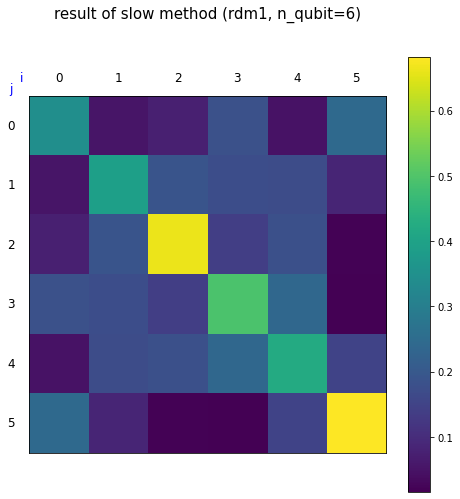

In [15]:
vis2dTensorKarnaugh(
    slow_rdm1_6q, title="result of slow method (rdm1, n_qubit=6)")


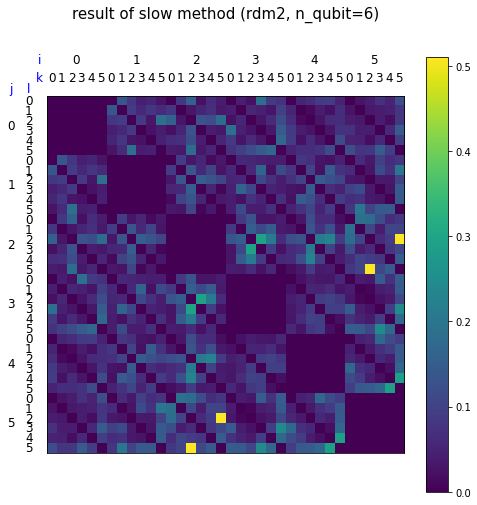

In [16]:
vis4dTensorNest(slow_rdm2_6q, title="result of slow method (rdm2, n_qubit=6)")


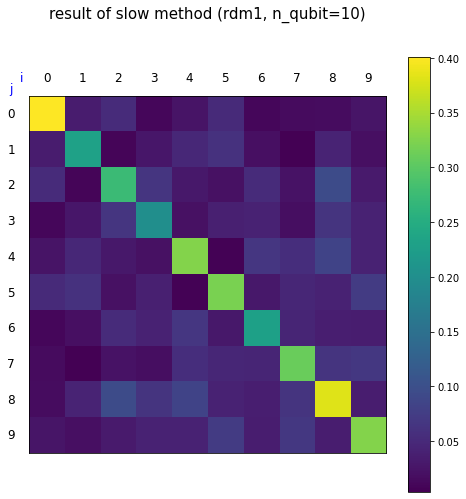

In [17]:
vis2dTensorKarnaugh(
    slow_rdm1_10q, title="result of slow method (rdm1, n_qubit=10)")


In [18]:
vis4dTensorNest(slow_rdm2_10q, size=15,
                title="result of slow method (rdm2, n_qubit=10)")


NameError: name 'slow_rdm2_10q' is not defined

### fast

いくつかの改良を施した、縮約密度行列の計算を行う。

主な改善としては以下が挙げられる。

- **0 要素の計算省略**

  two_rdm は、そのビジュアライザ結果からも分かる通り、ある条件で 0 要素であることが確定されている。<br>
  具体的には、コード中の`if _args[0] == _args[1] or _args[2] == _args[3]: continue`というのがそれにあたる。<br>
  (何故、このような条件で 0 要素であることが確定されるのかは、要検証)

- **crc_matrix 形式の活用**

  元のコードでは、csc_matrix 形式(get_sparse_operator の返り値の型)が上手く活用されず、疎性が破壊されていた。<br>
  各 operator を vis2dTensorKarnaugh で可視化したところ、これらの演算を表す行列はかなり疎性を有することが確認できる。(これが何故かも要検証)<br>
  その疎性を活かすように、state の方を csc_matrix 形式に一度変換することで、高速化を図っている。<br>
  なお、内積を取ってスカラーに変換する時には、疎性が既に失われているので、通常の numpy の array で計算をしている。

- **jw_operators のキャッシュ化**

  コードの実行時間を調べていくうちに、get_sparse_operator 自体がかなり重い操作であり、openfermion のソースコードを読むことで、それの特に jw_operators の作成に時間が掛かっていることを突き止めた。<br>
  これは、n_qubits が固定されている場合は、常に同じ結果である。<br>
  よって、毎回これを計算するのではなく、キャッシュ化するようにした。<br>
  実装には functools の lru_cache を用いて、openfermion のコードから著しく逸脱しないように努めた。今後別のコードを書く必要が生じた時にも、再利用性が高くなっていると思われる。


In [22]:
import scipy.sparse
from openfermion import jordan_wigner_ladder_sparse, FermionOperator
from functools import lru_cache
from numba import njit, int64


@lru_cache(maxsize=10)
def make_jw_operators(n_qubits: int):
    # Create a list of raising and lowering operators for each orbital.
    jw_operators = []
    for tensor_factor in range(n_qubits):
        jw_operators += [(jordan_wigner_ladder_sparse(n_qubits, tensor_factor,
                                                      0),
                          jordan_wigner_ladder_sparse(n_qubits, tensor_factor,
                                                      1))]
    return jw_operators


def my_jordan_wigner_sparse(fermion_operator: FermionOperator, n_qubits: int):
    jw_operators = make_jw_operators(n_qubits)
    # Construct the Scipy sparse matrix.
    n_hilbert = 2**n_qubits
    values_list = [[]]
    row_list = [[]]
    column_list = [[]]
    for term in fermion_operator.terms:
        coefficient = fermion_operator.terms[term]
        sparse_matrix = coefficient * scipy.sparse.identity(
            2**n_qubits, dtype=complex, format='csc')
        for ladder_operator in term:
            sparse_matrix = sparse_matrix * jw_operators[ladder_operator[0]][
                ladder_operator[1]]

        if coefficient:
            # Extract triplets from sparse_term.
            sparse_matrix = sparse_matrix.tocoo(copy=False)
            values_list.append(sparse_matrix.data)
            (row, column) = sparse_matrix.nonzero()
            row_list.append(row)
            column_list.append(column)

    values_list = np.concatenate(values_list)
    row_list = np.concatenate(row_list)
    column_list = np.concatenate(column_list)
    sparse_operator = scipy.sparse.coo_matrix(
        (values_list, (row_list, column_list)),
        shape=(n_hilbert, n_hilbert)).tocsc(copy=False)
    sparse_operator.eliminate_zeros()
    return sparse_operator


def my_get_sparse_operator(operator: FermionOperator, n_qubit: int):
    assert not isinstance(
        operator, (openfermion.DiagonalCoulombHamiltonian, openfermion.PolynomialTensor))
    assert isinstance(operator, FermionOperator)
    return my_jordan_wigner_sparse(operator, n_qubit)


def fast_expectation(operator: np.ndarray or FermionOperator,
                     state: np.array,
                     state_conj: np.array or scipy.sparse.csc_matrix,
                     n_qubit: int):
    if type(operator) == np.ndarray:
        return state_conj @ operator @ state
    else:
        return scipy.sparse.csc_matrix.toarray(state_conj @ my_get_sparse_operator(operator, n_qubit)) @ state


@njit(int64(int64[:]))
def get_sign_of_perm(perm):
    # sympy.combinatoricsのPermutationにある_af_parityを流用
    n = len(perm)
    a = [0] * n
    c = 0
    for j in range(n):
        if a[j] == 0:
            c += 1
            a[j] = 1
            i = j
            while perm[i] != j:
                i = perm[i]
                a[i] = 1
    return (n - c) % 2


def get_sign_of_args(args: List[int]):
    if len(args) - len(np.unique(args)) > 0:
        return 0
    return 1 if get_sign_of_perm(np.argsort(args)) == 0 else -1


def get_corresponding_index(args: tuple):
    k = len(args)//2
    assert len(args) == 2*k
    args_ = list(args)

    args1 = args_[:k]
    args2 = args_[k:]

    sign1 = get_sign_of_args(args1)
    sign2 = get_sign_of_args(args2)

    argmin1 = min(args1)
    argmin2 = min(args2)

    if_conjugate = argmin1 > argmin2
    if if_conjugate:
        args1_ref = sorted(args2)
        args2_ref = sorted(args1)
    else:
        args1_ref = sorted(args1)
        args2_ref = sorted(args2)
    return tuple(args1_ref + args2_ref), if_conjugate, sign1 * sign2


def fast_compute_one_rdm(_vector: np.ndarray):
    vector = np.copy(_vector)
    csc_vector_conj = scipy.sparse.csc_matrix(vector.conj())
    n_qubit = int(np.log2(vector.shape[0]))
    assert 2**n_qubit == vector.shape[0]
    rdm1 = np.zeros((n_qubit, n_qubit), dtype=complex)
    for i in range(n_qubit):
        for j in range(i, n_qubit):
            cij = fast_expectation(FermionOperator(
                f"{i}^ {j}"), vector, csc_vector_conj, n_qubit)
            rdm1[i, j] = np.copy(cij)
            rdm1[j, i] = np.copy(cij).conj()
    assert np.all(_vector == vector)
    return rdm1


def fast_compute_two_rdm(_vector: np.ndarray):
    vector = np.copy(_vector)
    csc_vector_conj = scipy.sparse.csc_matrix(vector.conj())
    n_qubit = int(np.log2(vector.shape[0]))
    rdm2 = np.zeros((n_qubit, n_qubit, n_qubit, n_qubit), dtype=complex)
    for i in range(n_qubit):
        for j in range(i, n_qubit):
            for k in range(j, n_qubit):
                for l in range(k, n_qubit):
                    unique_args = list(
                        set([(i, j, k, l), (i, k, j, l), (i, l, j, k)]))
                    for _args in unique_args:
                        if _args[0] == _args[1] or _args[2] == _args[3]:
                            continue
                        exp = fast_expectation(FermionOperator(
                            f"{_args[0]}^ {_args[1]}^ {_args[2]} {_args[3]}"),
                            vector, csc_vector_conj, n_qubit)
                        rdm2[_args] = exp
    for i in range(n_qubit):
        for j in range(n_qubit):
            for k in range(n_qubit):
                for l in range(n_qubit):
                    args = (i, j, k, l)
                    args_ref, if_conjugate, sign = get_corresponding_index(
                        args)
                    cijkl = np.copy(rdm2[args_ref]) * sign
                    if if_conjugate:
                        cijkl = cijkl.conj()
                    rdm2[i, j, k, l] = np.copy(cijkl)
    assert np.all(_vector == vector)
    return rdm2


In [23]:
rdm1_6q = fast_compute_one_rdm(vec_6q)


In [24]:
rdm2_6q = fast_compute_two_rdm(vec_6q)


In [25]:
rdm1_10q = fast_compute_one_rdm(vec_10q)


In [26]:
rdm2_10q = fast_compute_two_rdm(vec_10q)


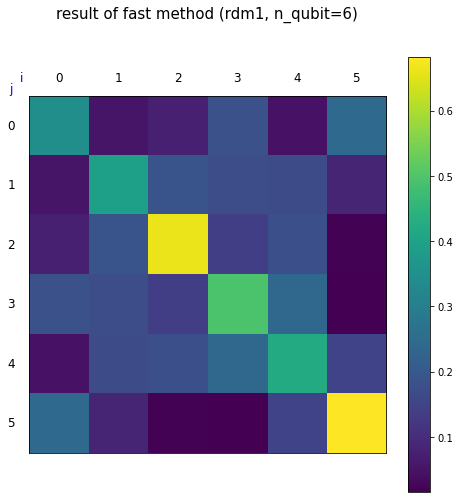

In [ ]:
vis2dTensorKarnaugh(rdm1_6q, title="result of fast method (rdm1, n_qubit=6)")


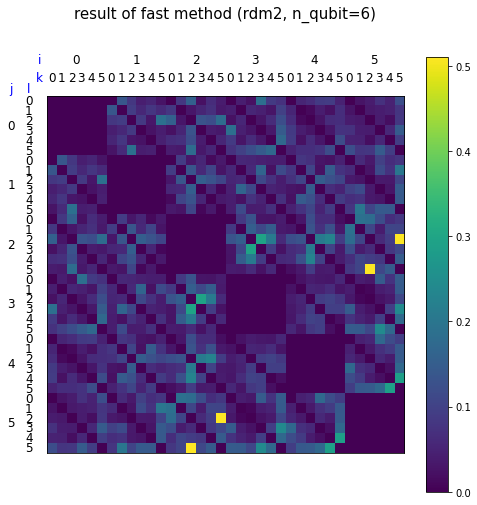

In [ ]:
vis4dTensorNest(rdm2_6q, title="result of fast method (rdm2, n_qubit=6)")


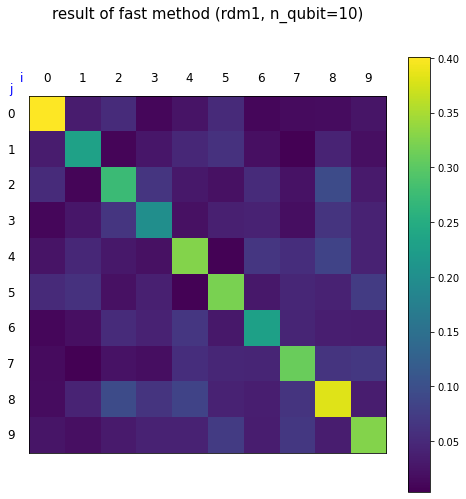

In [ ]:
vis2dTensorKarnaugh(rdm1_10q, title="result of fast method (rdm1, n_qubit=10)")


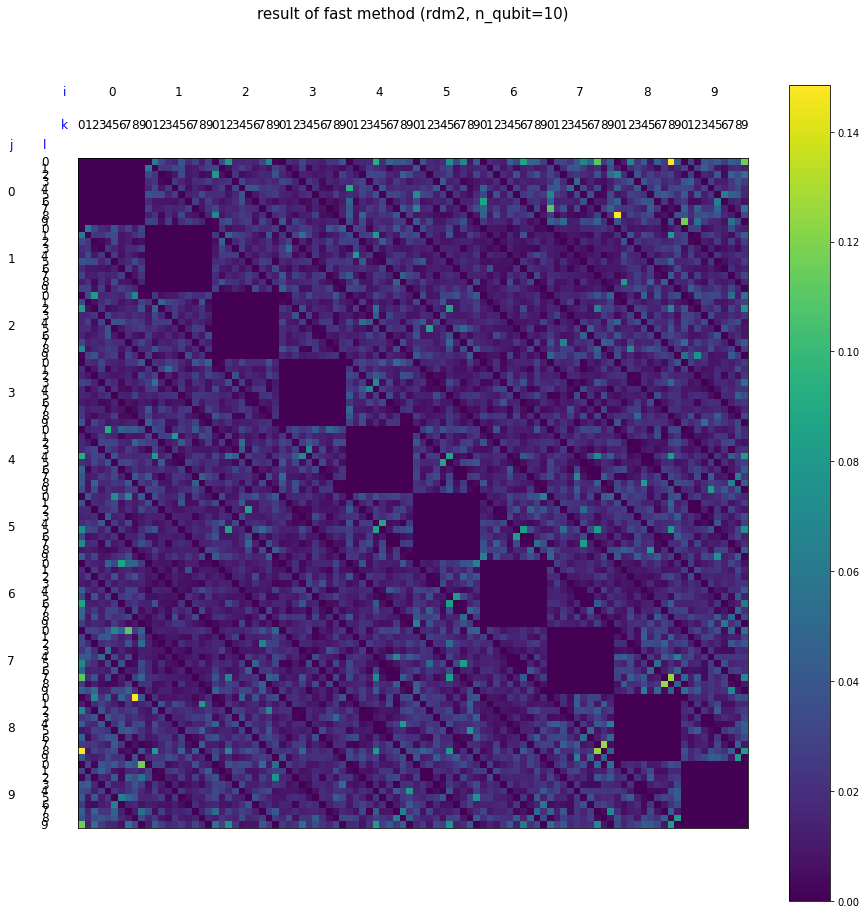

In [ ]:
vis4dTensorNest(rdm2_10q, size=15,
                title="result of fast method (rdm2, n_qubit=10)")


### 検証

assert によって、計算誤差以上の誤差が生じていない事を確認している。


In [ ]:
assert np.allclose(slow_rdm1_6q, rdm1_6q)
assert np.allclose(slow_rdm1_10q, rdm1_10q)
assert np.allclose(slow_rdm2_6q, rdm2_6q)
assert np.allclose(slow_rdm2_10q, rdm2_10q)


なお、参考までに、実行時間の表を載せておく。実行環境は**Windows 11 Home**の**Intel(R) Core(TM) i7-10510U CPU @ 1.80GHz 2.30 GHz**である。表の値は、vscode の拡張機能が提供する Jupyter によって表示される、セルごとの実行時間である。

|   種類   | slow  | fast |
| :------: | :---: | :--: |
| rdm1_6q  | 0.4s  | 0.7s |
| rdm1_10q | 5.5s  | 0.2s |
| rdm2_6q  | 2.2s  | 0.1s |
| rdm2_10q | 59.3s | 1.8s |


### 後処理など

以下は元コードと同一


In [ ]:
# openfermion内部では、2-RDMに定数倍をかけたものを活用している
tpdm = rdm2_6q / 2
tpdm_10q = rdm2_10q / 2

# openfermion内部では、1-RDMに定数倍をかけたものを活用している
opdm = (2 / (n_electrons - 1)) * np.einsum('ijjk', tpdm)
opdm_10q = (2 / (n_electrons - 1)) * np.einsum('ijjk', tpdm_10q)


In [ ]:
# n-qubit系 (n-fermion mode系)では shape = (N, N)
opdm.shape


(6, 6)

In [ ]:
# n-qubit系 (n-fermion mode系)では shape = (N, N, N, N)
tpdm.shape


(6, 6, 6, 6)